**this is a template notebook. To get a 60 you will need to complete the first three chapters. From there is additional points. In the template you'll see text between <> so \<example> where you will have to isert your own text. 
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# Tom van der Lans | Wine Quality
## DMS - Regression Assignment (v1.1)
Author: Tom van der Lans</span><br>
Student number: 63554<br>
Date: 16-05-2022

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* Matplot
* seaborn
* sklearn
* statsmodels

From these we will need the following libraries:

In [1]:
#!pip install seaborn
# !pip install statsmodels
# !pip install sklearn

#enter here all those 'from .... import ....'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mpl_toolkits.mplot3d import Axes3D



# 1. The Data
We are going to use the datafile songs_normalize.csv. This contains data from "https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009".

In [2]:
#enter the code to load the data
wine = pd.read_csv("winequality-red.csv")

Here's a quick look at the data:

In [3]:
#enter the code to see the first few rows of the data
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


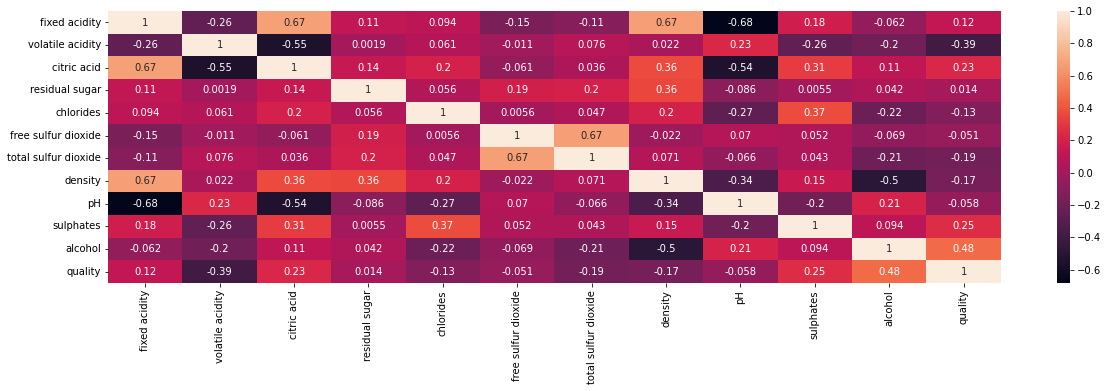

In [4]:
# let's see the correlation between variables
corrMatrix = wine.corr()
plt.figure(figsize= (20, 5))
sn.heatmap(corrMatrix, annot=True)
plt.show()

We are gonna predict the Fixed acidity (The predominant acids) of wine by looking at the density and ph of the wine. As we can see in the correlation matrix there is a positive and negative trend between Fixed acidity and density, ph. One has a correlation of 0.67 and the other -0.68.

*note:* You can score a +.5 point if you don't just pick randomly your variables, but use either a pairplot (a plot showing all scatterplots between all possible pairs of variables), a heatmap, and/or a correlation matrix, to pick some that at least have a reasonable correlation.

# 2. The Bivariate Regression

## 2.1. The First Bivariate Regression

First we are going to look at the predictions using only one of our two x's. 

We start with predicting valence using danceability. Below a visualisation of these two:

In [5]:
#Setting the variables
x1 = wine['density'].to_numpy().reshape((-1, 1))
x2 = wine['pH'].to_numpy().reshape((-1, 1))
y = wine['fixed acidity'].to_numpy().reshape((-1, 1))

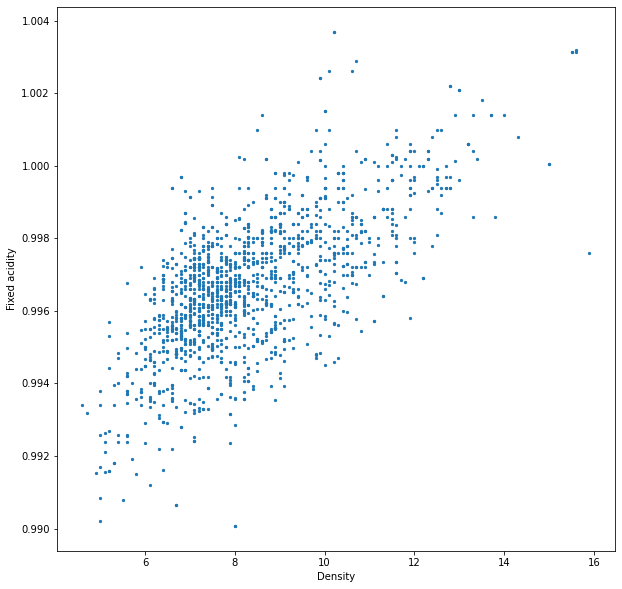

In [6]:
#enter code to show scatterplot
plt.figure(figsize=(10, 10))
plt.scatter(y, x1, s=5)
plt.ylabel('Fixed acidity')
plt.xlabel('Density')
plt.show()



As can be seen from the scatterplot there seems to be a linear correlation between these 2, it is still a bit scattered but the trend is really visible.

Now that we have a visual inspection its time to perform a bivariate regression (twice, once for each x variable). 

We first split the data into training and testing data. We start again with the x of: danceability

In [7]:
#add code to create training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(x1, y, test_size=0.4, random_state=101)

Now setup the linear regression model and fit our training data:

In [8]:
#add code to create linear regression model
model = LinearRegression().fit(X_train, Y_train)
yPred = model.predict(X_train)


In [9]:
b1 = model.coef_[0]
print('The slope (b1): ', b1[0])
b0 = model.intercept_
print('The intercept (b0): ', b0[0])
MA = metrics.mean_absolute_error(Y_train, yPred)
print('Mean absolute error: ', MA)
MS = metrics.mean_squared_error(Y_train, yPred)
print('Mean squared error: ', MS)

The slope (b1):  624.0665662502033
The intercept (b0):  -613.7932798927716
Mean absolute error:  1.0029215011565824
Mean squared error:  1.612277285060105


Lets see how well the model performed with the training data, by visualisation:

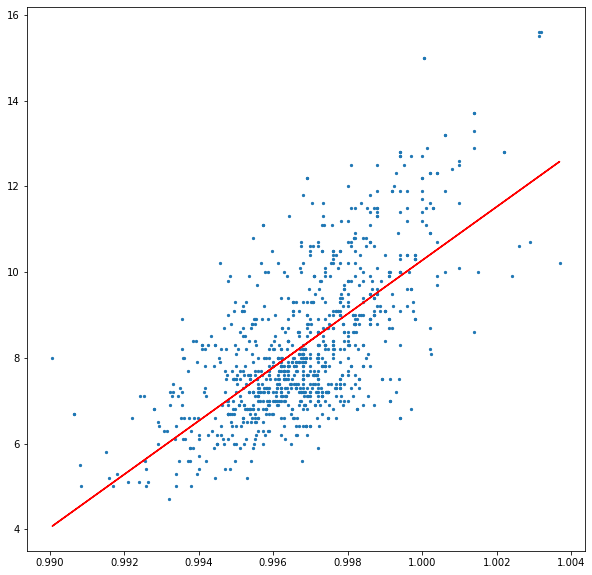

In [10]:
#add code to show scatterplot with the regression line

plt.figure(figsize=(10, 10))
plt.scatter(X_train, Y_train, s=5)
plt.plot(X_train, yPred, color='red')

plt.show()

The line is the best fit for the plot. When the line would be completely horizontal it would mean that there is no corelation whatsoever between the X and the Y. The line now is pretty diagonal that shows us that there is a corelation between the x and the y.

Besides from a visual, we can also use some metrics.

In [11]:
#code to show the results of the statsmodels.api summary
newX = sm.add_constant(x1)
newModel = sm.OLS(y, newX).fit()
print(newModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     1287.
Date:                Tue, 24 May 2022   Prob (F-statistic):          3.07e-207
Time:                        19:59:47   Log-Likelihood:                -2682.5
No. Observations:                1599   AIC:                             5369.
Df Residuals:                    1597   BIC:                             5380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -605.9599     17.122    -35.391      0.0

What these variables mean:
R-Squared: The estimate of the relationship between the x (density) and the y (acidity), the higher the value the bigger the relationship
coef const: the coefficient not attached to any variables.
coef x1: the multiplicative factor of x (density)

We can also check how well our model worked by using the testing data:

In [12]:
#code to show the accuracy score
model.score(X_test, Y_test)

0.41840038864888496

This number shows us that when we are using the testing data with which we didn't train the model with, the accuracy score is around the 0.41 (changes every run). This tells us the corelation between the x and the y. The higher the better.

Now we repeat all these steps, but using the other x-variable: energy.

## 2.2. The Second Bivariate Regression

In this section we are going to repeat all the steps from the previous one, but now we are going to try to predict fixed acidity. based on the ph.

Below a visualisation of these two:

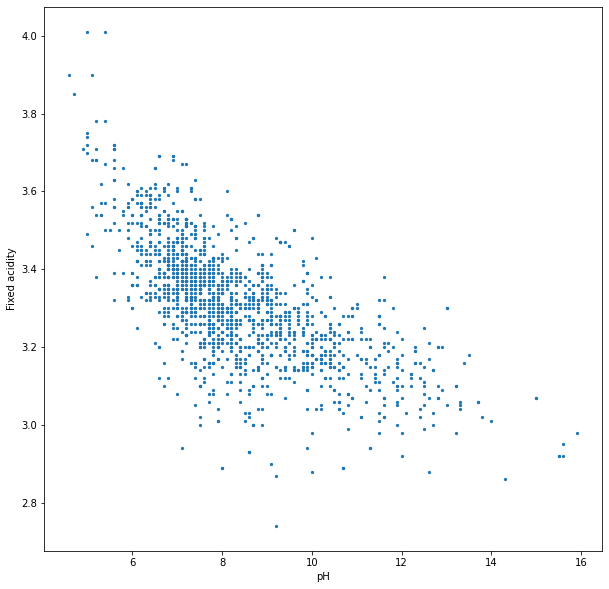

In [13]:
#enter code to show scatterplot
plt.figure(figsize=(10, 10))
plt.scatter(y, x2, s=5)
plt.ylabel('Fixed acidity')
plt.xlabel('pH')
plt.show()



As can be seen from the scatterplot there seems to be a negative correlation between the ph and the fixed acidity of wine. We see a big difference with the first plot that we did, and that is that this one is nog going up but down. This is also a corelation but a negative one.

Creating again the training/testing sets and the model itself:

In [14]:
#add code here to split the data and the model itself:
X_train, X_test, Y_train, Y_test = train_test_split(x2, y, test_size=0.2, random_state=101)

xRes = X_train.reshape((-1,1))
yRes = Y_train.reshape((-1,1))

model = LinearRegression().fit(xRes, yRes)

model.fit(xRes, yRes)
Y_pred = model.predict(xRes)

Now lets see how this performs:

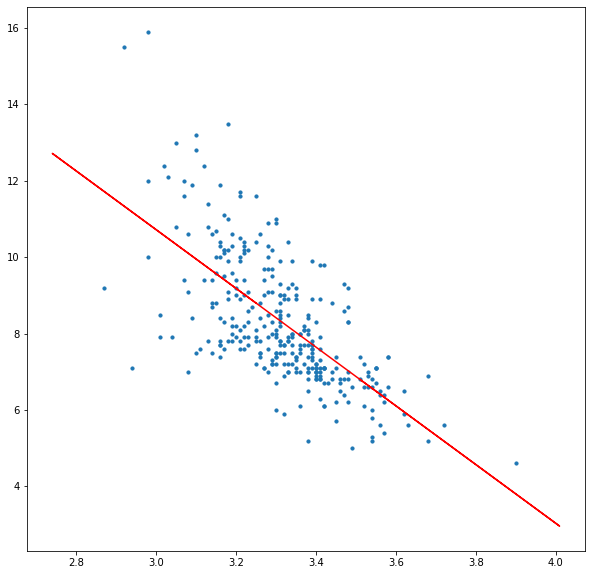

In [15]:
#add code to show both the scatterplot with the regression line, and the model summary results.
plt.figure(figsize=(10, 10))
plt.scatter(X_test, Y_test, s=10)
plt.plot(xRes, Y_pred, color="red")

plt.show()

In [16]:
#code to show the results of the statsmodels.api summary
newX = sm.add_constant(x2)
newModel = sm.OLS(y, newX).fit()
print(newModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1396.
Date:                Tue, 24 May 2022   Prob (F-statistic):          4.06e-220
Time:                        19:59:47   Log-Likelihood:                -2652.8
No. Observations:                1599   AIC:                             5310.
Df Residuals:                    1597   BIC:                             5320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8228      0.683     49.502      0.0

Again we can see the R-squared that is around the 0.466, this isn't really different from the first comparison. But where it get different is at the coef. Here we can see that it is a negative value and this is true because it's a negative relation between the x and the y.

# 3. Multivariate Regression Analysis

In the previous chapter two separate bivariate regression analyses were performed to predict the valence based on danceability and energy separately. In this chapter we are going to look if we can make an even better prediction if we try to predict valence based on BOTH of these together.

We begin with combining the two x's into one X:

In [17]:
#add code here to add the two x's into one
x1Res = x1.reshape((-1, 1))
x2Res = x2.reshape((-1, 1))
yRes = y.reshape((-1, 1))

multiX = np.hstack((x1Res, x2Res))

To actually perform the regression now, we can use the exact same method as before with the bivariate one:

In [18]:
#code to split the data, and create & fit the model:
X_train, X_test, y_train, y_test = train_test_split(multiX, yRes, test_size=0.2, random_state=202)

multiModel = LinearRegression().fit(X_train, y_train)
yPred = multiModel.predict(multiX)

A visualization becomes now more difficult, since it would have to be in 3D. (0.5 bonus if you manage to do this). However, the model summary still works:

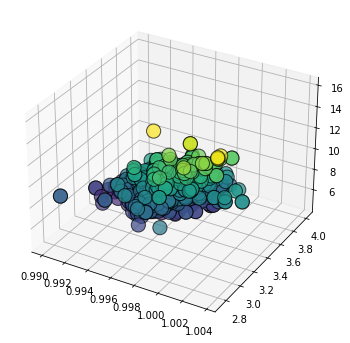

In [19]:
# 3D visualization

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=y)
plt.show()

In [20]:
#code to show model summary and accuracy score
newX = sm.add_constant(multiX)
newModel = sm.OLS(y, newX).fit()
print(newModel.summary())

print(multiModel.score(X_test, y_test))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1699.
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        19:59:48   Log-Likelihood:                -2243.1
No. Observations:                1599   AIC:                             4492.
Df Residuals:                    1596   BIC:                             4508.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -424.9821     14.048    -30.252      0.0

Instead of looking at the R-square, we should be looking at the adjusted R-square. If you use multiple predictors in a model, the r-squared can give a false image of the prediction. Is the R-squared so high because it better or because it has more predictors. The adj. R-squared accounts for this. 

We also see more rows now in the 'coef' column. This is because in the single bivariate analyses we only use one x, this only give the coef of one x. In the multivariate analyses we are using 2 x values, so we also have 2 coef values.

By using both x's we can see that we have a higher R-squared. this time one of 0.680 while the last two where around the 0.45. This shows us that if we use multiple x's that the change that there is a relationship between both of them is higher. 

A last thing to do would be to check the VIF's:

In [21]:
#add code here to see the VIF's
[variance_inflation_factor(newX, j) for j in range(newX.shape[1])]

[325274.8542624638, 1.1321930942464447, 1.132193094246445]

Here we can see 3 different value's, we can ignore the first one because that is the constant value, so we have to look at the next 2 values. It's important that there are under the 10, which they are! They have the same value because we made a comparison between them.

<font size="5"><center>-----Chapters 1 to 3 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 4. Selecting Input Variables

In chapter 3 we improved on the model to predict fixed acidity by using two input variables. We can actually add as many input variables as we like. Lets explore this by simply first adding ALL other variables as X.

In [22]:
#add code to create an X variable using all variables, except of course your y variable:
y = wine['fixed acidity'].to_numpy().reshape((-1, 1))
x1 = wine['volatile acidity'].to_numpy().reshape((-1, 1))
x2 = wine['citric acid'].to_numpy().reshape((-1, 1))
x3 = wine['residual sugar'].to_numpy().reshape((-1, 1))
x4 = wine['chlorides'].to_numpy().reshape((-1, 1))
x5 = wine['free sulfur dioxide'].to_numpy().reshape((-1, 1))
x6 = wine['total sulfur dioxide'].to_numpy().reshape((-1, 1))
x7 = wine['density'].to_numpy().reshape((-1, 1))
x8 = wine['pH'].to_numpy().reshape((-1, 1))
x9 = wine['sulphates'].to_numpy().reshape((-1, 1))
x10 = wine['alcohol'].to_numpy().reshape((-1, 1))
x11 = wine['quality'].to_numpy().reshape((-1, 1))

megaX = np.hstack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))


We could first have a quick look at the results of this model:

In [23]:
#add code here to model and fit the new X with the y, and show the model summary and accuracy score:
newX = sm.add_constant(megaX)
newModel = sm.OLS(y, newX).fit()
newPred = newModel.predict(newX)
print(newModel.summary())

det = metrics.r2_score(yRes, yPred)
adjDet = 1 - (1-det) * (yRes.shape[0] - 1) / (yRes.shape[0] - megaX.shape[1] - 1)

print(adjDet)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     977.0
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        19:59:48   Log-Likelihood:                -1515.6
No. Observations:                1599   AIC:                             3055.
Df Residuals:                    1587   BIC:                             3120.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -631.8087     12.996    -48.616      0.0

However we have to be careful with those VIF's. So lets see:

In [24]:
#add code here to show the VIF's.
vif = [variance_inflation_factor(newX, j) for j in range(newX.shape[1])]
vif.pop(0)
print(vif)

[1.8742205522540114, 2.7822219446832084, 1.386861909980852, 1.4218015889503426, 1.9447372352847596, 2.0998564198273524, 2.4301160918302993, 1.6278185619612648, 1.4521061791083685, 2.365045421283584, 1.5629346301972313]


We need to remove the ones with a VIF higher than 10, but each time we remove one, the VIF's change. Lets create a small Python function that removes the highest VIF each time, until none of them are anymore above 10.

In [25]:
#add your function code here.
for idx, x in enumerate(vif):
     if (x > 10):
            vif.pop(idx)
            break


Lets run the function, and then use the result to create a new model:

In [26]:
#add code here that runs the just made function, and uses the result for the new model:


We might also keep an eye out on that adjusted R-square. Iterate over all possible combinations of input variables we have remaining, and see which combination yields the highest adjusted R-square.

In [27]:
#add your code here.


Finally lets see how this new model performs:

In [28]:
#add code here to model and fit the new X with the y, and show the model summary and accuracy score:


<span style='background:yellow'>\<interpret the result, how well is the model now compared to our previous models?></span>

# 5. Another splitting method

To obtain the the test and training data we used the so-called hold-out method. However other methods also exist for this. In this chapter an explanation **and practical example** is given for the \<your splitting method>.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work in principal, how is it different from the hold-out method?. You will need more cells than the ones below!></span>

In [29]:
#code using your method


<span style='background:yellow'>\<explain the result></span>

# 6. A New Technique

So far, we only used the 'basic' simple linear regression (the bivariate) and multiple linear regression. However, there are many variations, as also seen on the slides. In this chapter the \<your regression method> is explained.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work, what makes it different from the regular linear regression, in which situations might this be optimal. You will need more cells than the ones below></span>

In [30]:
#code using your method


# 7. Surprise

There is a lot written about regression analysis, and although a lot was discussed during the lecture, that was just a tip of an iceberg. One thing for example that was not mentioned is \<start explaining from here....>

----this chapter is for the 10. It should be something substantial, related to regression and not already discussed----

---examples could be an explanation on the Gradient Descent approach to linear programming, or using Matrix Algebra to obtain the linear regression equation----